<a href="https://colab.research.google.com/github/alejandrolq/ProyectoFinalStaticalLearningI/blob/main/EnsayoSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nombre: José Alejandro López Quel**

**Carné: 21001127**

**Statical Learning I**

**Sección U**

**Proyecto Final**

# Support vector machine (SVM)

SVM o Support Vector Machine es un modelo lineal para problemas de clasificación y regresión. Puede resolver problemas lineales y no lineales. La idea de SVM es simple: el algoritmo crea una línea o un hiperplano que separa los datos en clases. SVM es un clasificador discriminativo definido formalmente por un hiperplano separador. En otras palabras, dados los datos de entrenamiento etiquetados (aprendizaje supervisado), el algoritmo genera un hiperplano óptimo que categoriza nuevos ejemplos. En el espacio bidimensional, este hiperplano es una línea que divide un plano en dos partes, donde cada clase se encuentra a cada lado.

SVM utiliza un espacio denominado espacio de hipótesis de funciones lineales, el cual se encuentra definido dentro de un espacio de mayor dimensión inducido por un Kernel, en el cual las hipótesis son entrenadas por un algoritmo tomado de la teoría de optimización el cual utiliza elementos de la teoría de generalización.

Según el algoritmo SVM se deben encontrar los puntos más cercanos a la línea de ambas clases, estos puntos se denominan vectores de soporte. Se calculan la distancia entre la línea y los vectores de soporte. Esta distancia se llama margen. El objetivo de SVM es maximizar el margen. El hiperplano para el que el margen es máximo es el hiperplano óptimo.

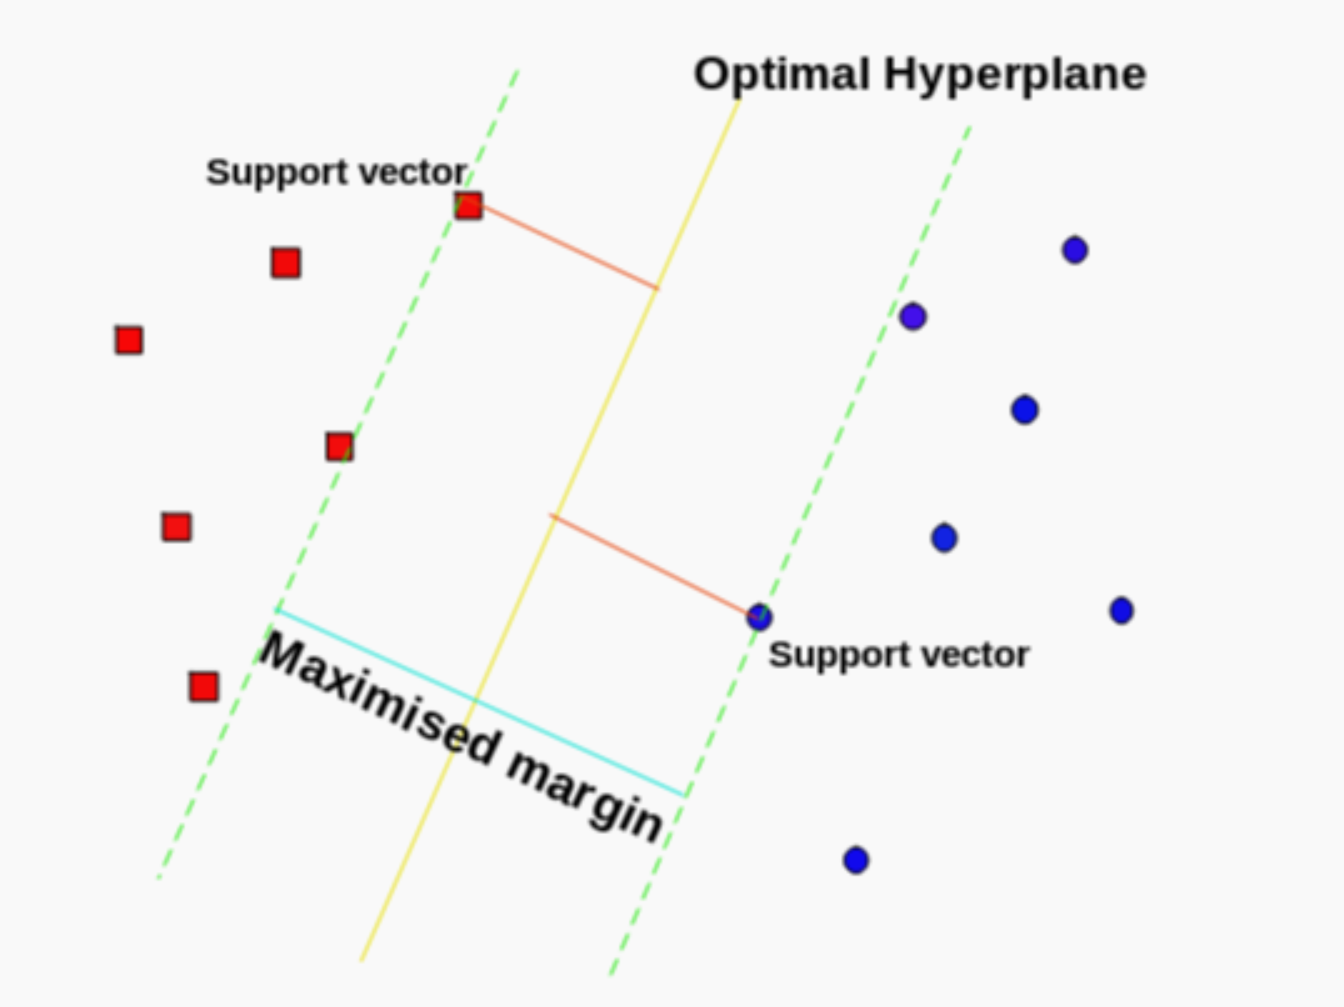

## Hipótesis de SVM
La hipótesis de SVM es bastante sencilla, se tiene que para los pesos (w) lo siguiente:

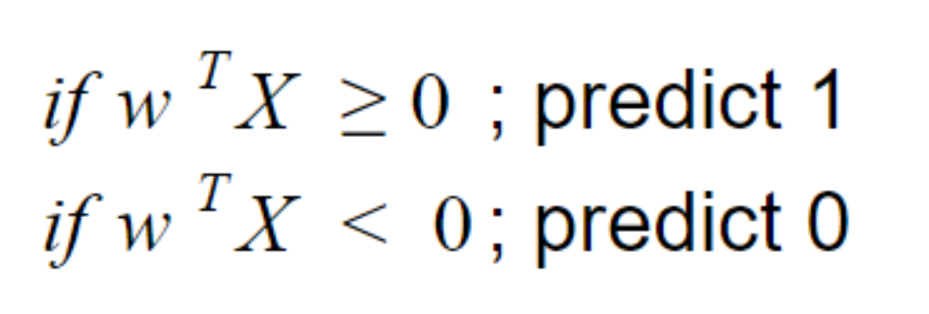

Por lo que se puede definir la hipótesis como la distancia entre un punto de datos y el límite de decisión.

## Función de costo
Se tiene que la función de costo de SVM penaliza no solo por clasificación errónea sino también cuando los puntos comienzan a acercarse al límite de decisión, por lo tanto, el algoritmo de optimización debe encontrar pesos tales que se mantenga una distancia (o margen) entre las clases.

Por lo tanto se tiene que la función de costo denominada hinge (bisagra) esta dada por:

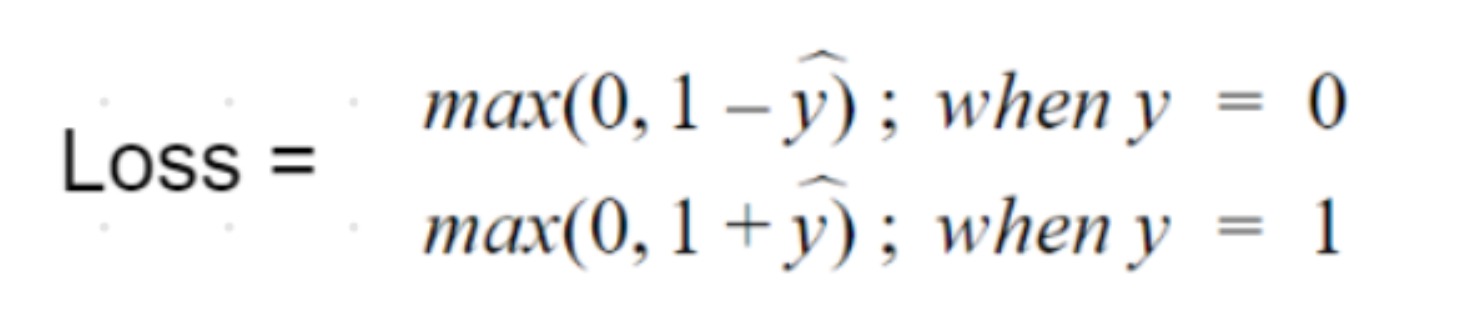

La función de costo nos indica que:
- Para y = 1, si el valor de la hipótesis es mayor o igual que 1, la pérdida es 0. Si la hipótesis se encuentra entre 0 y 1 o es negativa, la pérdida tiene un valor positivo y aumenta linealmente.
- Para y = 0, si el valor de la hipótesis es mayor o igual que -1, la pérdida es 0. Si la hipótesis se encuentra entre -1 y 0 o es positiva, la pérdida es positiva y aumenta linealmente. 

Al combinar estas dos expresiones se tiene que la función de costo para m experimentos está dada por:

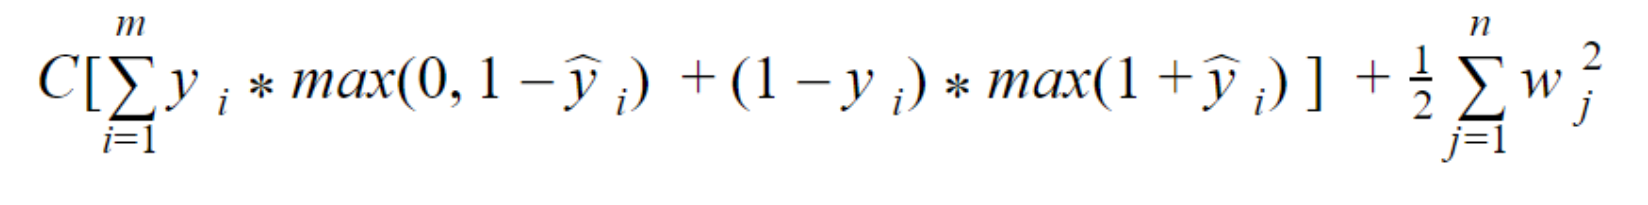

Donde: 
- C es el parámetro de regularización.

## Kernel Trick
El kernel trick es lo que hace que los modelos SVM sean tan potentes. Permite que el algoritmo aprenda límites de decisión más complejos y no solo lineales.

Se tiene que la hipótesis y la función de costo para SVM con kernels estan dadas por:
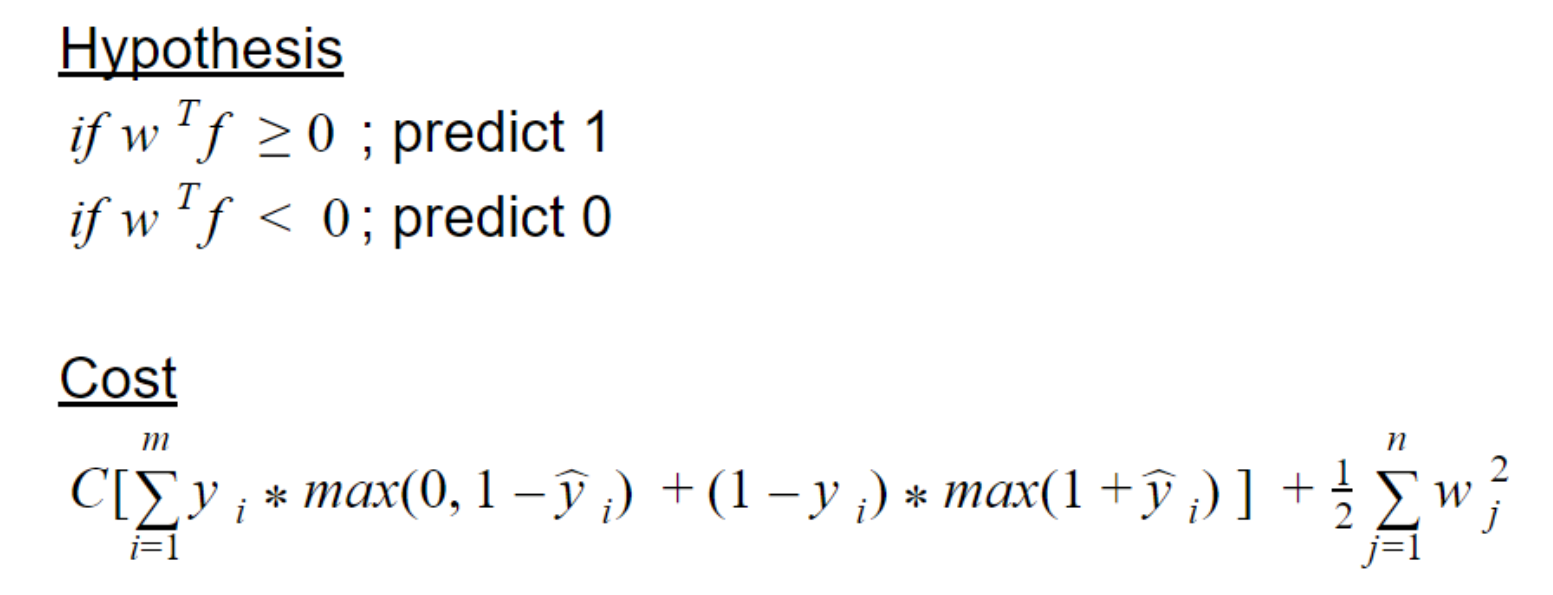


En lugar de X, la hipótesis tiene "f", que es una matriz de nuevas características. Se obtienen los valores de estas características de una función y esta función es lo que se denomina kernel. En el costo "y hat" representa la hipótesis recién formulada.

Los kernels son una función de X con puntos de referencia. Usando estas funciones se calculan nuevas características para el modelo. Entonces, para cada landmark se tiene una característica de la siguiente manera:

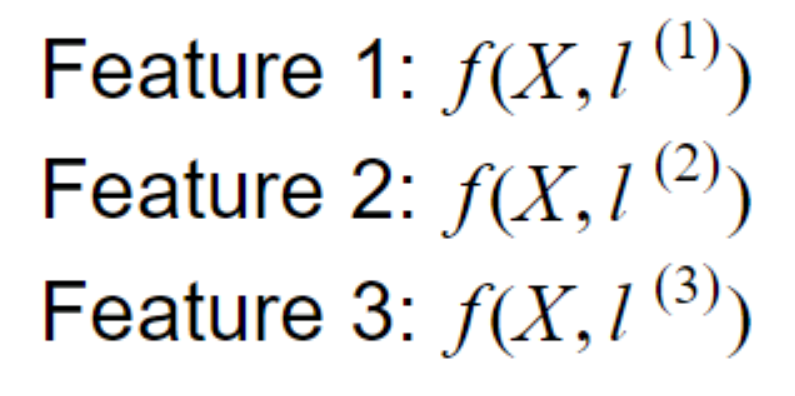

Estas funciones o kernels pueden ser de diferentes tipos, como el Kernel Gaussiano, el Kernel Polinomial o si se utilizan las características genéricas sin emplear Kernels, las cuales se denominan Linear Kernel. Los kernels gaussianos son los más utilizados.

A continuación se muestra el ejemplo del Kernel Gaussiano:

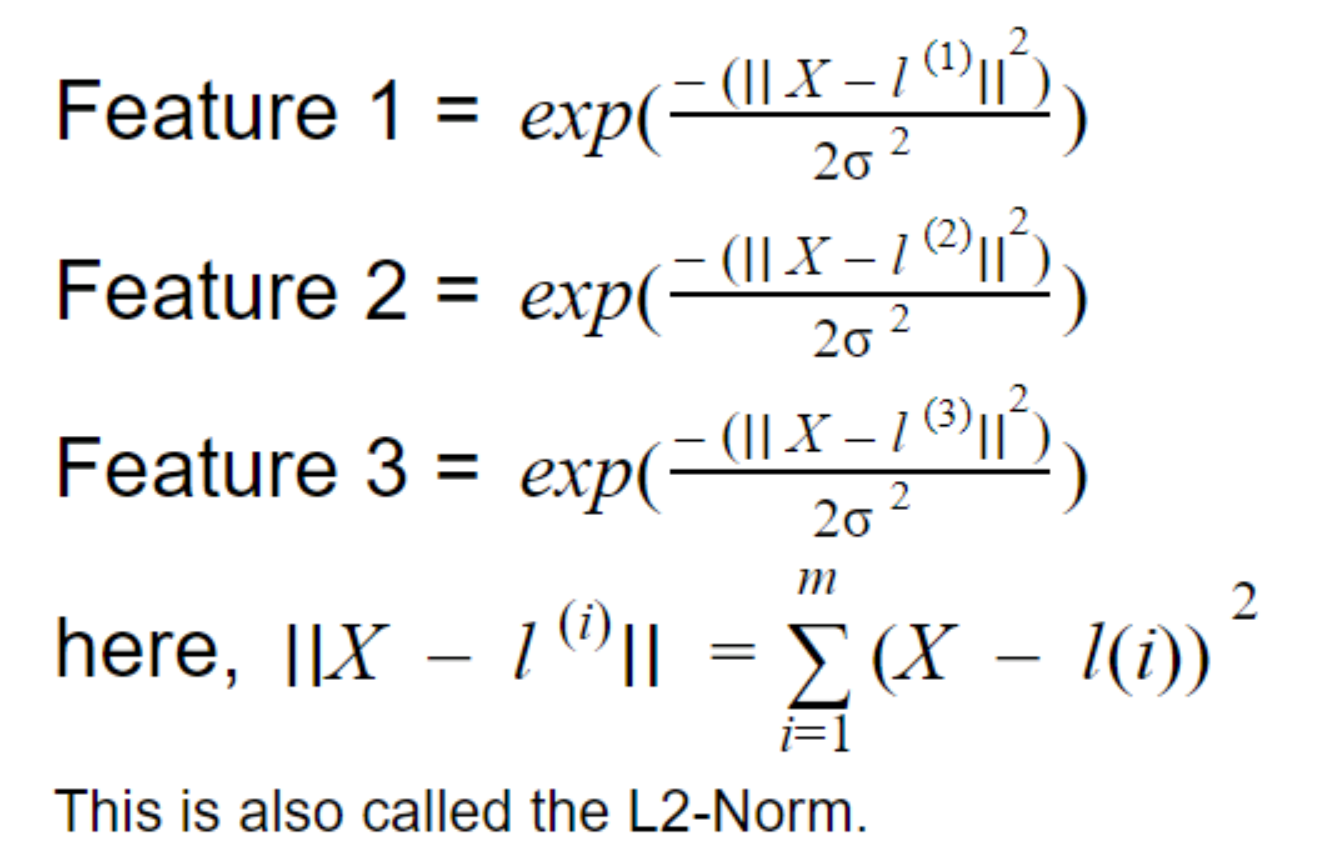

## Ventajas y desventajas

### Ventajas
1. Se puede aplicar a datos representados en cualquier espacio de Hilbert (donde pueda definir una medida de distancia).
2. Relativamente pocos parámetros a estimar.
3. Se pueden formular nuevas extensiones (flexibilidad).

### Desventajas
1. Determinar los Kernels a utilizar es complejo.
2. Sólo es un clasificador binario.

## Ejemplos

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Datos
# ==============================================================================
url = 'https://raw.githubusercontent.com/JoaquinAmatRodrigo/' \
       + 'Estadistica-machine-learning-python/master/data/ESL.mixture.csv'
datos = pd.read_csv(url)
datos.head(3)

,X1,X2,y
0,2.526093,0.321050,0
1,0.366954,0.031462,0
2,0.768219,0.717486,0


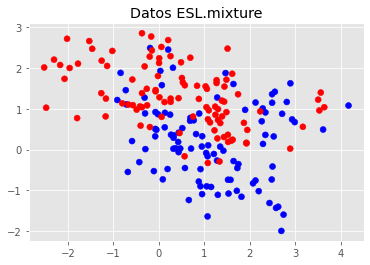

In [3]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(datos.X1, datos.X2, c=datos.y);
ax.set_title("Datos ESL.mixture");

### SVM lineal


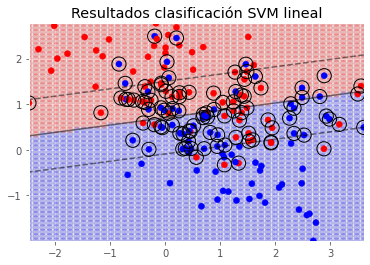

In [4]:
# División de los datos en train y test
# ==============================================================================
X = datos.drop(columns = 'y')
y = datos['y']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
# Creación del modelo SVM lineal
# ==============================================================================
modelo = SVC(C = 100, kernel = 'linear', random_state=123)
modelo.fit(X_train, y_train)

# Representación gráfica de los límites de clasificación
# ==============================================================================
# Grid de valores
x = np.linspace(np.min(X_train.X1), np.max(X_train.X1), 50)
y = np.linspace(np.min(X_train.X2), np.max(X_train.X2), 50)
Y, X = np.meshgrid(y, x)
grid = np.vstack([X.ravel(), Y.ravel()]).T

# Predicción valores grid
pred_grid = modelo.predict(grid)

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(grid[:,0], grid[:,1], c=pred_grid, alpha = 0.2)
ax.scatter(X_train.X1, X_train.X2, c=y_train, alpha = 1)

# Vectores soporte
ax.scatter(
    modelo.support_vectors_[:, 0],
    modelo.support_vectors_[:, 1],
    s=200, linewidth=1,
    facecolors='none', edgecolors='black'
)

# Hiperplano de separación
ax.contour(
    X,
    Y,
    modelo.decision_function(grid).reshape(X.shape),
    colors = 'k',
    levels = [-1, 0, 1],
    alpha  = 0.5,
    linestyles = ['--', '-', '--']
)

ax.set_title("Resultados clasificación SVM lineal");

In [5]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X_test)
predicciones

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0])

In [6]:
# Accuracy de test del modelo 
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 70.0%


### SVM radial

In [7]:
# Grid de hiperparámetros
# ==============================================================================
param_grid = {'C': np.logspace(-5, 7, 20)}

# Búsqueda por validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = SVC(kernel= "rbf", gamma='scale'),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = -1,
        cv         = 3, 
        verbose    = 0,
        return_train_score = True
      )

# Se asigna el resultado a _ para que no se imprima por pantalla
_ = grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)

,param_C,mean_test_score,std_test_score,mean_train_score,std_train_score
8,1.12884,0.762520,0.023223,0.790778,0.035372
12,379.269,0.750641,0.076068,0.868777,0.007168
7,0.263665,0.750175,0.030408,0.778228,0.026049
9,4.83293,0.744118,0.044428,0.815729,0.026199
11,88.5867,0.738062,0.064044,0.859431,0.019840


In [8]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

modelo = grid.best_estimator_

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'C': 1.1288378916846884} : 0.7625203820172374 accuracy


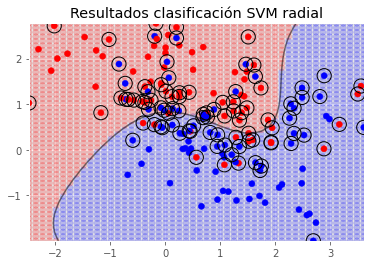

In [9]:
# Representación gráfica de los límites de clasificación
# ==============================================================================
# Grid de valores
x = np.linspace(np.min(X_train.X1), np.max(X_train.X1), 50)
y = np.linspace(np.min(X_train.X2), np.max(X_train.X2), 50)
Y, X = np.meshgrid(y, x)
grid = np.vstack([X.ravel(), Y.ravel()]).T

# Predicción valores grid
pred_grid = modelo.predict(grid)

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(grid[:,0], grid[:,1], c=pred_grid, alpha = 0.2)
ax.scatter(X_train.X1, X_train.X2, c=y_train, alpha = 1)

# Vectores soporte
ax.scatter(
    modelo.support_vectors_[:, 0],
    modelo.support_vectors_[:, 1],
    s=200, linewidth=1,
    facecolors='none', edgecolors='black'
)

# Hiperplano de separación
ax.contour(
    X,
    Y,
    modelo.decision_function(grid).reshape(X.shape),
    colors='k',
    levels=[0],
    alpha=0.5,
    linestyles='-'
)

ax.set_title("Resultados clasificación SVM radial");

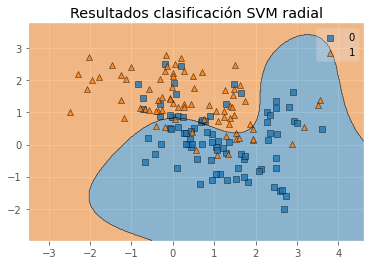

In [10]:
# Representación gráfica utilizando plot_decision_regions() de mlxtend
# ==============================================================================
fig, ax = plt.subplots(figsize=(6,4))
plot_decision_regions(
    X = X_train.to_numpy(),
    y = y_train.flatten(),
    clf = modelo,
    ax = ax
)
ax.set_title("Resultados clasificación SVM radial");

In [12]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X_test)
predicciones

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [13]:
# Accuracy de test del modelo 
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 80.0%


In [14]:
# Matriz de confusión de las predicciones de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    predicciones,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,14,3
1,5,18


# Conclusiones

1. SVMs ha resultado ser uno de los mejores clasificadores para un amplio abanico de situaciones, por lo que se considera uno de los referentes dentro del ámbito de aprendizaje estadístico y machine learning.
2. SVM se basa en el concepto de hiperplano. 
3. La solución a la hipotesis planteada por SVM consiste en seleccionar como clasificador óptimo al que se conoce como maximal margin hyperplane o hiperplano óptimo de separación, que se corresponde con el hiperplano que se encuentra más alejado de todas las observaciones de entrenamiento.

# Referencias

1. Müller, A. C., & Guido, S. (2016). Introduction to Machine Learning with Python: A Guide for Data Scientists (1st ed.). O’Reilly Media.
2. Máquinas de Vector Soporte (SVM) con Python. (2020). Ciencia de Datos. https://www.cienciadedatos.net/documentos/py24-svm-python.html
3. Mishra, A. (2020, June 25). Support Vector Machines | Towards Data Science. Medium. https://towardsdatascience.com/decoding-support-vector-machines-5b81d2f7b76f
4. Pupale, R. (2019, February 11). Support Vector Machines(SVM) — An Overview - Towards Data Science. Medium. https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989
5. Patel, S. (2018, November 10). Chapter 2 : SVM (Support Vector Machine) — Theory - Machine Learning 101. Medium. https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72